In [1]:
#importando os módulos

import pandas as pd
import numpy as np
from scipy.stats import mode
low_memory=False

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
#Leitura do dataset utilizado na análise
df = pd.read_csv(r'df_per.csv', delimiter=',')

In [3]:
df.head()

,Ano,Feminino,Masculino
0,2009.0,20.13,79.87
1,2010.0,19.28,80.72
2,2011.0,18.68,81.32
3,2012.0,17.97,82.03
4,2013.0,17.43,82.57


In [4]:
import seaborn as sns

In [5]:
X = df['Ano'].values
Y = df['Feminino'].values

In [8]:
import statsmodels.api as sm

In [9]:
modelo = sm.OLS(Y, X)

In [10]:
resultado = modelo.fit()

In [11]:
X = sm.add_constant(X)

In [12]:
modelo2 = sm.OLS(Y, X)

In [13]:
resultado2 = modelo2.fit()

In [84]:
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     189.2
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           7.53e-07
Time:                        23:05:43   Log-Likelihood:                -3.4216
No. Observations:                  10   AIC:                             10.84
Df Residuals:                       8   BIC:                             11.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1114.6856     79.791     13.970      0.0

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [14]:
coef_linear, coef_angular = resultado2.params

In [15]:
reta = coef_angular*X+coef_linear

In [16]:
X = X[:,1]
reta = reta[:,1]

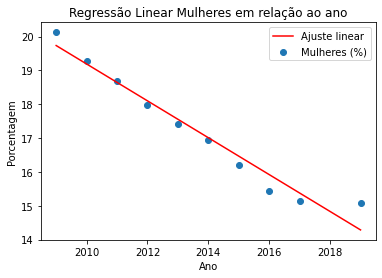

In [17]:
plt.scatter(X,Y,label='Mulheres (%)');
plt.title("Regressão Linear Mulheres em relação ao ano")
plt.plot(X,reta,label='Ajuste linear',color='red');
plt.xlabel('Ano');
plt.ylabel('Porcentagem');
plt.legend();

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [19]:
caracteristicas_2= PolynomialFeatures(degree=2)
X = X.reshape(-1, 1)
X_Polinomio_2 = caracteristicas_2.fit_transform(X)

In [20]:
modelo2 = LinearRegression()
modelo2.fit(X_Polinomio_2, Y)
Y_Polinomio_2 = modelo2.predict(X_Polinomio_2)

In [44]:
caracteristicas_3= PolynomialFeatures(degree=3)
X = X.reshape(-1, 1)
X_Polinomio_3 = caracteristicas_3.fit_transform(X)

In [45]:
modelo3 = LinearRegression()
modelo3.fit(X_Polinomio_3, Y)
Y_Polinomio_3 = modelo3.predict(X_Polinomio_3)

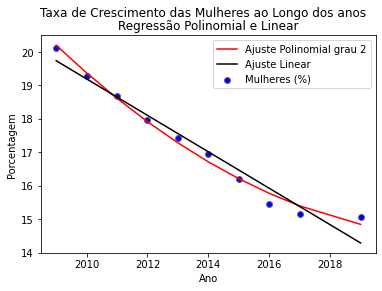

In [79]:
plt.suptitle("Taxa de Crescimento das Mulheres ao Longo dos anos")
plt.title("Regressão Polinomial e Linear")
plt.scatter(X,Y,color='b',edgecolors="dimgray", label='Mulheres (%)');
plt.plot(X,Y_Polinomio_2,color='r',label='Ajuste Polinomial grau 2');
#plt.plot(X,Y_Polinomio_3,color='black',label='Ajuste Polinomial 3ª grau');
plt.plot(X,reta,label='Ajuste Linear',color='k');
plt.xlabel('Ano');
plt.ylabel('Porcentagem');
plt.legend();

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
MAE = mean_absolute_error(Y,reta)
MAE2 = mean_absolute_error(Y,Y_Polinomio_2)
MAE3 = mean_absolute_error(Y,Y_Polinomio_3)

RMSE = np.sqrt(mean_squared_error(Y,reta))
RMSE2 = np.sqrt(mean_squared_error(Y,Y_Polinomio_2))
RMSE3 = np.sqrt(mean_squared_error(Y,Y_Polinomio_3))

In [49]:
print("MAE = {:0.2f}".format(MAE))
print("MAE (grau=2) = {:0.4f}".format(MAE2))
print("MAE (grau=3) = {:0.4f}".format(MAE3))

print("RMSE = {:0.2f}".format(RMSE))
print("RMSE (grau=2) = {:0.4f}".format(RMSE2))
print("RMSE (grau=3) = {:0.4f}".format(RMSE3))

MAE = 0.26
MAE (grau=2) = 0.1470
MAE (grau=3) = 0.1108
RMSE = 0.34
RMSE (grau=2) = 0.1763
RMSE (grau=3) = 0.1220


In [81]:
from sklearn.metrics import r2_score

In [82]:
r2_1 = r2_score(Y,Y_Polinomio_2)

In [83]:
print("R2 (Grau 1) = ",r2_1)

R2 (Grau 1) =  0.9891351276144406
